In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/content/drive/MyDrive/01 Data Science with Python ML deep learning/Project 02 : Electrical Data Analysiss and Visuallization/ELE - ELE.csv"
df=pd.read_csv(path)
df.head()

,Date,Etime,Status,Freq_Avg[Hz],U1_Avg[V],Ufnd1_Avg[V],Udeg1_Avg[deg],U2_Avg[V],Ufnd2_Avg[V],Udeg2_Avg[deg],...,WP+dem[Wh],WP-dem[Wh],WQLAGdem[varh],WQLEADdem[varh],Pdem+[W],Pdem-[W],QdemLAG[var],QdemLEAD[var],PFdem,Pulse
0,2023-07-20 18:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-07-20 18:25:30,00:00:30,0.0,50.0,23200.0,13300.0,0.0,23000.0,13600.0,119.0,...,48000.0,0.0,53000.0,0.0,5810000.0,0.0,6340000.0,0.0,0.676,0.0
2,2023-07-20 18:26:00,00:01:00,0.0,50.1,23200.0,13300.0,0.0,23000.0,13700.0,119.0,...,49000.0,0.0,53000.0,0.0,5880000.0,0.0,6410000.0,0.0,0.676,0.0
3,2023-07-20 18:26:30,00:01:30,0.0,50.1,23200.0,13300.0,0.0,23000.0,13600.0,119.0,...,49000.0,0.0,54000.0,0.0,5890000.0,0.0,6430000.0,0.0,0.676,0.0
4,2023-07-20 18:27:00,00:02:00,0.0,50.1,23200.0,13300.0,0.0,23000.0,13600.0,119.0,...,49000.0,0.0,53000.0,0.0,5860000.0,0.0,6400000.0,0.0,0.675,0.0


In [ ]:
col_for_study=[]

In [ ]:
s='U3_Avg[V'
len(s)

8

In [ ]:
# used an condition to seperate usefull information from dataset
useful_col=[]
for i in df.columns:
  if len(i)<=9:
    #print(i)
    useful_col.append(i)

#useful_col
ele= df[useful_col]

#drop some columns which are not used or not important for data analysis electrical aspects
ele.drop(columns=['Status','WP+[Wh]','WP-[Wh]', 'Ecost', 'Pdem+[W]', 'Pdem-[W]', 'PFdem', 'Pulse'])

,Date,Etime,U1_Avg[V],U2_Avg[V],U3_Avg[V],I1_Avg[A],I2_Avg[A],I3_Avg[A],P1_Avg[W],P2_Avg[W],...,I3_Min[A],P1_Min[W],P2_Min[W],P3_Min[W],P_Min[W],S_Min[VA],PF1_Min,PF2_Min,PF3_Min,PF_Min
0,2023-07-20 18:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-07-20 18:25:30,00:00:30,23200.0,23000.0,23000.0,214.0,219.0,213.0,1580000.0,2990000.0,...,207.0,1510000.0,2900000.0,1210000.0,5630000.0,8340000.0,-0.547,0.996,0.435,0.673
2,2023-07-20 18:26:00,00:01:00,23200.0,23000.0,23000.0,216.0,222.0,216.0,1600000.0,3020000.0,...,209.0,1530000.0,2930000.0,1220000.0,5710000.0,8460000.0,-0.548,0.996,0.433,0.673
3,2023-07-20 18:26:30,00:01:30,23200.0,23000.0,23000.0,217.0,223.0,216.0,1600000.0,3030000.0,...,210.0,1540000.0,2950000.0,1230000.0,5730000.0,8490000.0,-0.550,0.996,0.436,0.674
4,2023-07-20 18:27:00,00:02:00,23200.0,23000.0,23000.0,216.0,222.0,215.0,1600000.0,3010000.0,...,209.0,1540000.0,2910000.0,1220000.0,5680000.0,8410000.0,-0.552,0.996,0.432,0.674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,2023-07-21 16:42:30,22:17:30,23200.0,23000.0,23000.0,114.0,120.0,123.0,553000.0,1590000.0,...,120.0,531000.0,1560000.0,993000.0,3090000.0,4650000.0,-0.357,-0.970,0.625,-0.664
2676,2023-07-21 16:43:00,22:18:00,23200.0,23000.0,23000.0,111.0,118.0,120.0,524000.0,1550000.0,...,117.0,454000.0,1490000.0,983000.0,2960000.0,4490000.0,-0.318,-0.957,0.617,-0.659
2677,2023-07-21 16:43:30,22:18:30,23200.0,23000.0,23000.0,112.0,118.0,121.0,504000.0,1560000.0,...,116.0,447000.0,1470000.0,1020000.0,2930000.0,4450000.0,-0.318,-0.956,0.641,-0.659
2678,2023-07-21 16:43:56,22:18:56,23200.0,23000.0,23000.0,116.0,123.0,126.0,548000.0,1620000.0,...,119.0,492000.0,1530000.0,1010000.0,3030000.0,4580000.0,-0.338,-0.964,0.636,-0.662


In [ ]:
ele.isnull().sum()

Date         0
Etime        1
Status       2
U1_Avg[V]    2
U2_Avg[V]    2
U3_Avg[V]    2
I1_Avg[A]    2
I2_Avg[A]    2
I3_Avg[A]    2
P1_Avg[W]    2
P2_Avg[W]    2
P3_Avg[W]    2
P_Avg[W]     2
S_Avg[VA]    2
PF1_Avg      2
PF2_Avg      2
PF3_Avg      2
PF_Avg       2
U1_Max[V]    2
U2_Max[V]    2
U3_Max[V]    2
I1_Max[A]    2
I2_Max[A]    2
I3_Max[A]    2
P1_Max[W]    2
P2_Max[W]    2
P3_Max[W]    2
P_Max[W]     2
S_Max[VA]    2
PF1_Max      2
PF2_Max      2
PF3_Max      2
PF_Max       2
U1_Min[V]    2
U2_Min[V]    2
U3_Min[V]    2
I1_Min[A]    2
I2_Min[A]    2
I3_Min[A]    2
P1_Min[W]    2
P2_Min[W]    2
P3_Min[W]    2
P_Min[W]     2
S_Min[VA]    2
PF1_Min      2
PF2_Min      2
PF3_Min      2
PF_Min       2
WP+[Wh]      2
WP-[Wh]      2
Ecost        2
Pdem+[W]     2
Pdem-[W]     2
PFdem        2
Pulse        2
dtype: int64

In [ ]:
ele.drop([0,2679],inplace=True)

<ipython-input-7-70b2bbad85b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ele.drop([0,2679],inplace=True)


In [ ]:
f = [f for f in ele.columns]

for i in f:
  data = ele.copy()
  plt.subplots(1,1)
  plt.plot(data['Date'],data[i])
  plt.xlabel("Date")
  plt.ylabel(i)
  plt.title(i)
  plt.show()

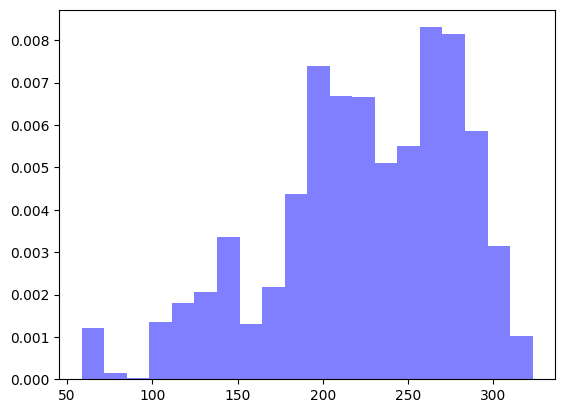

In [ ]:
plt.hist(ele['I1_Max[A]'], bins=20,alpha=0.5, density=True, color='blue', label='Histogram')
plt.show()

<Axes: xlabel='I1_Avg[A]', ylabel='Count'>

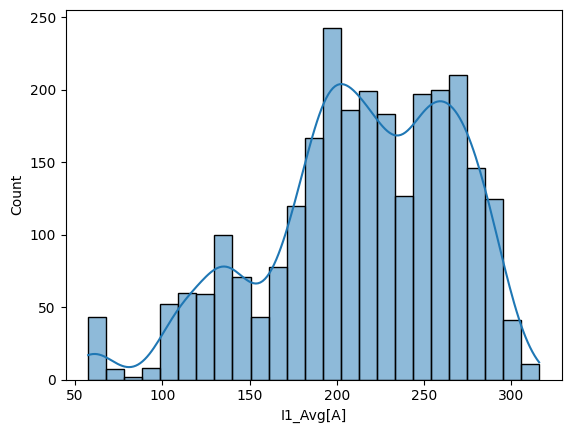

In [ ]:
sns.histplot(ele['I1_Avg[A]'], kde=True)

In [ ]:
ele['I1_Avg[A]'].skew()

-0.6050318971180481

In [ ]:
type(ele['Date'])

pandas.core.series.Series

In [ ]:
ele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2678 entries, 1 to 2678
Data columns (total 55 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2678 non-null   object 
 1   Etime      2678 non-null   object 
 2   Status     2678 non-null   float64
 3   U1_Avg[V]  2678 non-null   float64
 4   U2_Avg[V]  2678 non-null   float64
 5   U3_Avg[V]  2678 non-null   float64
 6   I1_Avg[A]  2678 non-null   float64
 7   I2_Avg[A]  2678 non-null   float64
 8   I3_Avg[A]  2678 non-null   float64
 9   P1_Avg[W]  2678 non-null   float64
 10  P2_Avg[W]  2678 non-null   float64
 11  P3_Avg[W]  2678 non-null   float64
 12  P_Avg[W]   2678 non-null   float64
 13  S_Avg[VA]  2678 non-null   float64
 14  PF1_Avg    2678 non-null   float64
 15  PF2_Avg    2678 non-null   float64
 16  PF3_Avg    2678 non-null   float64
 17  PF_Avg     2678 non-null   float64
 18  U1_Max[V]  2678 non-null   float64
 19  U2_Max[V]  2678 non-null   float64
 20  U3_Max[V

TypeError: ignored